In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Load data from run_results.jsonl
data = []
with open('final_position.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert to DataFrame
position_df = pd.DataFrame(data)
position_df
# 假设这里有修改 best_ask 为 best_bid 并结合 convert_price 的操作
if 'best_ask' in position_df.columns:
    position_df.rename(columns={'best_ask': 'best_bid'}, inplace=True)
    # 结合 best_bid 和 convert_price 列，当其中一个为 NaN 时保留非 NaN 的值
    position_df['combined_price'] = position_df['best_bid'].combine_first(position_df['convert_price'])

# Drop columns with NaN values
position_df = position_df.dropna(axis=1)
position_df = position_df.tail(5)
position_df

,timestamp,USD,pair,total_value,duration_seconds,coin_quantity,coin_value,combined_price
48,2025-03-26T21:42:47.934093,3.025570e+03,BTCUSDT,1.000305e+07,300.398529,113.898409,1.000002e+07,87820.31
49,2025-03-26T21:47:55.441238,7.058738e+06,BTCUSDT,1.000143e+07,301.267169,33.526324,2.942693e+06,87725.50
50,2025-03-26T21:53:02.596083,7.507921e+06,BTCUSDT,1.000035e+07,300.793621,28.471219,2.492426e+06,87341.60
51,2025-03-26T21:58:09.869729,5.374659e+06,BTCUSDT,9.999744e+06,300.963789,53.061702,4.625085e+06,86932.80
52,2025-03-26T22:03:16.823230,8.921419e+06,BTCUSDT,1.000043e+07,300.697947,12.412014,1.079007e+06,87078.24


/var/folders/1q/74k1w1yd2gz6966p00xyk5500000gn/T/ipykernel_35759/1836983654.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_trade_history['rolling_mean'] = matched_trade_history['price'].rolling(window=window).mean()
/var/folders/1q/74k1w1yd2gz6966p00xyk5500000gn/T/ipykernel_35759/1836983654.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_trade_history['rolling_std'] = matched_trade_history['price'].rolling(window=window).std()
/var/folders/1q/74k1w1yd2gz6966p00xyk5500000gn/T/ipyke

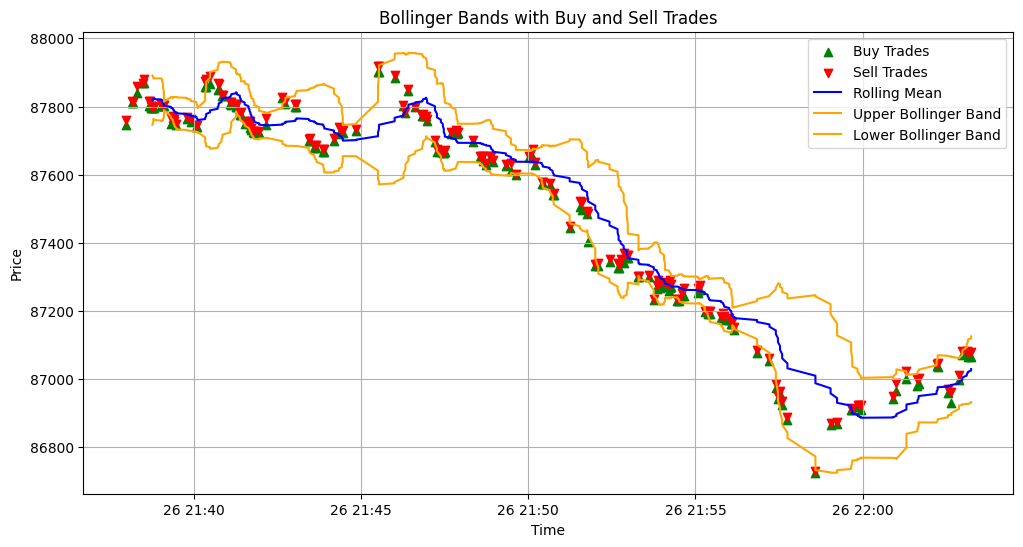

In [69]:

# Assume trade_history is a DataFrame with a 'time' column
# and positions_df has a 'time' column too
# Import trade_history data
# Replace 'trade_history.jsonl' with the actual file path or data source
trade_history = pd.read_json('trade_history.jsonl', lines=True)

# Convert 'time' columns to datetime type if they are not already
position_df['ending_time'] = pd.to_datetime(position_df['timestamp'])
position_df['starting_time'] = pd.to_datetime(position_df['timestamp']) - pd.to_timedelta(position_df['duration_seconds'], unit='s')
trade_history['time'] = pd.to_datetime(trade_history['time'])

# Create a mask for matching trades
mask = trade_history['time'].apply(lambda x: any(
    (x >= position_df['starting_time']) & (x <= position_df['ending_time'])
))

# Filter the trade history
matched_trade_history = trade_history[mask]

# Display the result
matched_trade_history

import matplotlib.pyplot as plt
# Assume 'matched_trade_history' is the DataFrame with 'type' (buy/sell) and 'price' columns
# Separate buy and sell trades
buy_trades = matched_trade_history[matched_trade_history['type'] == 'buy']
sell_trades = matched_trade_history[matched_trade_history['type'] == 'sell']

# Calculate Bollinger Bands
window = 20
std_multiplier = 2

# Calculate rolling mean and standard deviation
matched_trade_history['rolling_mean'] = matched_trade_history['price'].rolling(window=window).mean()
matched_trade_history['rolling_std'] = matched_trade_history['price'].rolling(window=window).std()

# Calculate upper and lower Bollinger Bands
matched_trade_history['upper_band'] = matched_trade_history['rolling_mean'] + (std_multiplier * matched_trade_history['rolling_std'])
matched_trade_history['lower_band'] = matched_trade_history['rolling_mean'] - (std_multiplier * matched_trade_history['rolling_std'])

# Plot the data
plt.figure(figsize=(12, 6))

# Plot buy and sell trades
plt.scatter(buy_trades['time'], buy_trades['price'], color='green', label='Buy Trades', marker='^')
plt.scatter(sell_trades['time'], sell_trades['price'], color='red', label='Sell Trades', marker='v')

# Plot Bollinger Bands
plt.plot(matched_trade_history['time'], matched_trade_history['rolling_mean'], label='Rolling Mean', color='blue')
plt.plot(matched_trade_history['time'], matched_trade_history['upper_band'], label='Upper Bollinger Band', color='orange')
plt.plot(matched_trade_history['time'], matched_trade_history['lower_band'], label='Lower Bollinger Band', color='orange')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bollinger Bands with Buy and Sell Trades')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [64]:
# Basic statistics
print("Total runs:", len(position_df))
print("Average duration per run:", position_df['duration_seconds'].mean(), "seconds")
print("Total positions recorded:", len(position_df))

Total runs: 7
Average duration per run: 943.1613632857143 seconds
Total positions recorded: 7


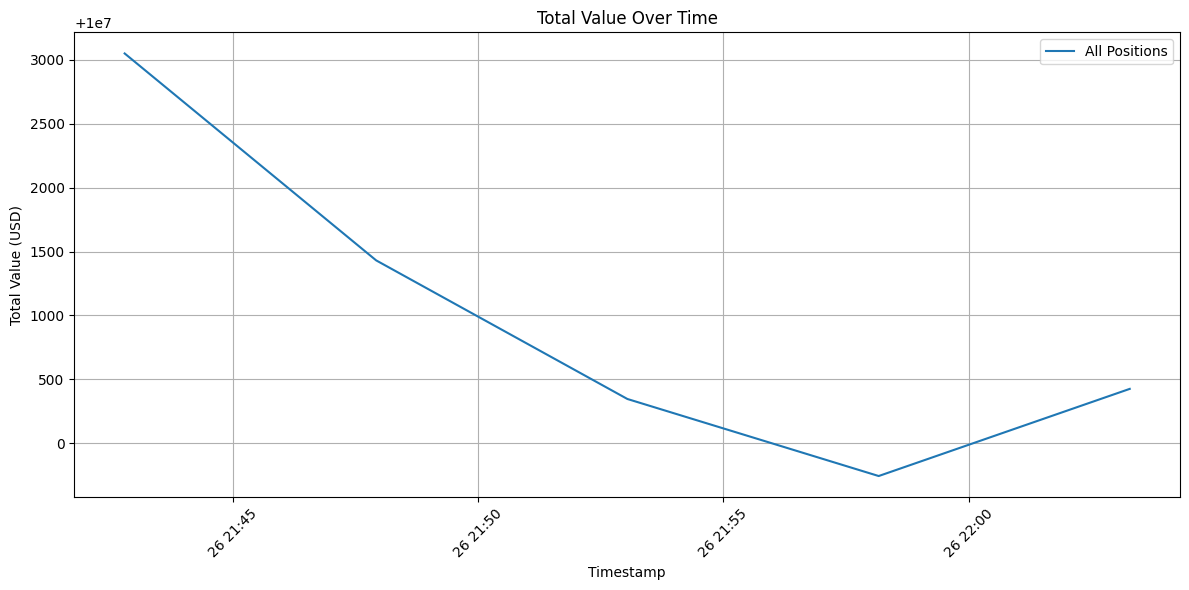

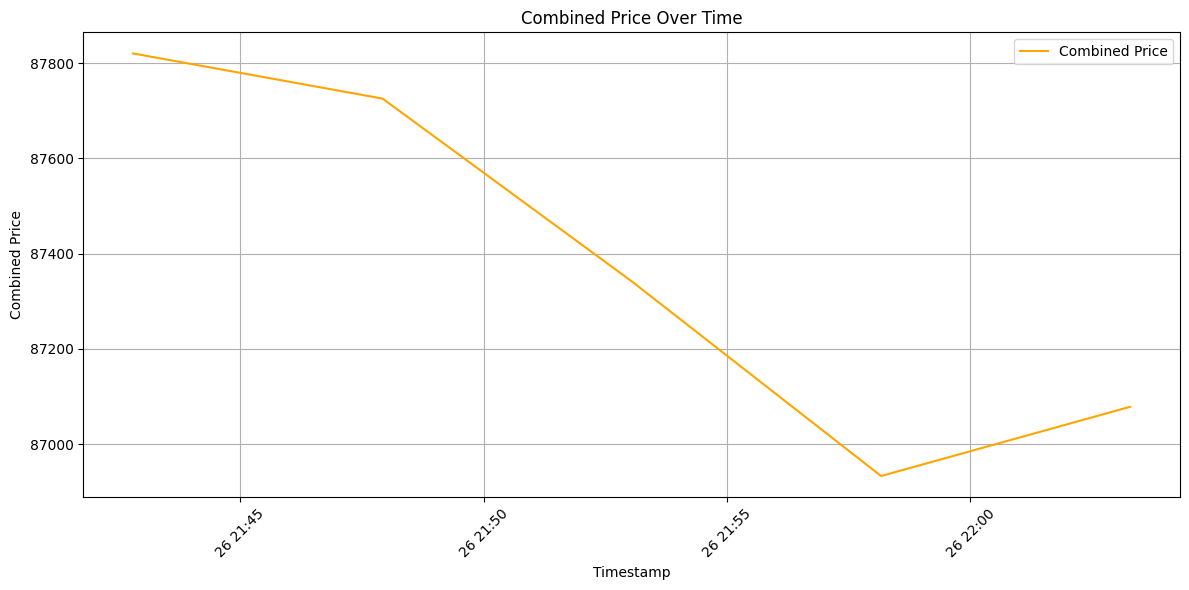

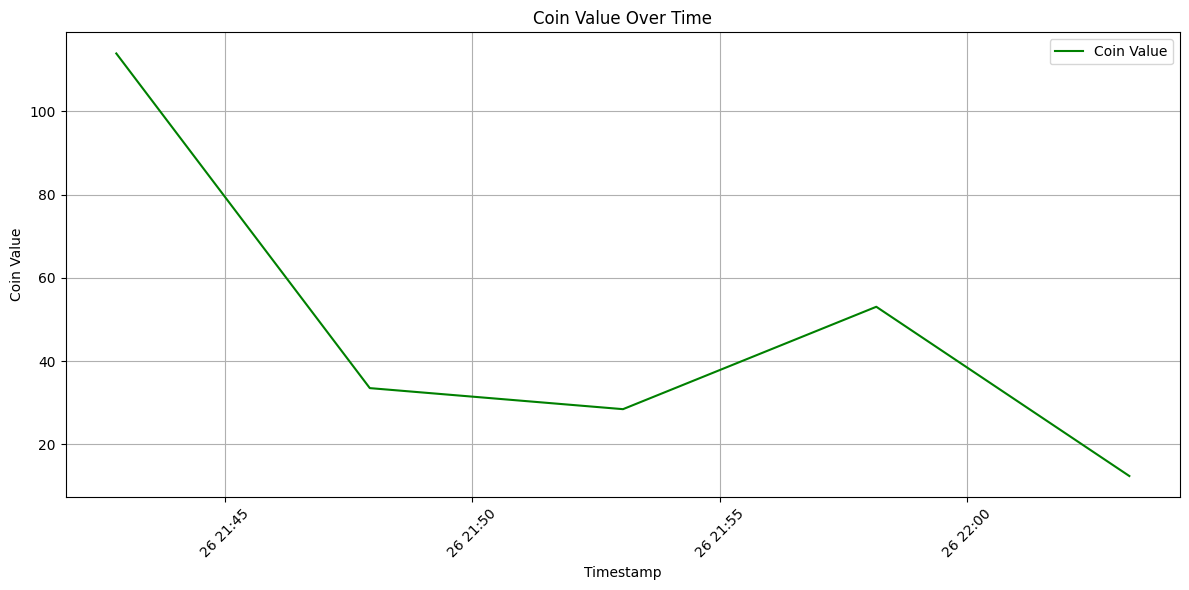

In [70]:
# Plot total value over time
plt.figure(figsize=(12, 6))

# Convert timestamp to datetime for proper plotting
position_df['timestamp'] = pd.to_datetime(position_df['timestamp'])

# Plot all positions
plt.plot(position_df['timestamp'], position_df['total_value'], label='All Positions')

# Formatting
plt.title('Total Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Value (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Plot combined_price over time
plt.figure(figsize=(12, 6))

# Assume position_df also has a 'combined_price' column
# Convert timestamp to datetime for proper plotting (already done above, but for clarity)
position_df['timestamp'] = pd.to_datetime(position_df['timestamp'])

# Plot combined_price
plt.plot(position_df['timestamp'], position_df['combined_price'], label='Combined Price', color='orange')

# Formatting
plt.title('Combined Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Combined Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Plot coin_value over time
plt.figure(figsize=(12, 6))

# Assume position_df also has a 'coin_value' column
# Convert timestamp to datetime for proper plotting (already done above, but for clarity)
position_df['timestamp'] = pd.to_datetime(position_df['timestamp'])

# Plot coin_value
plt.plot(position_df['timestamp'], position_df['coin_quantity'], label='Coin Value', color='green')

# Formatting
plt.title('Coin Value Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Coin Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



KeyError: 'best_ask'

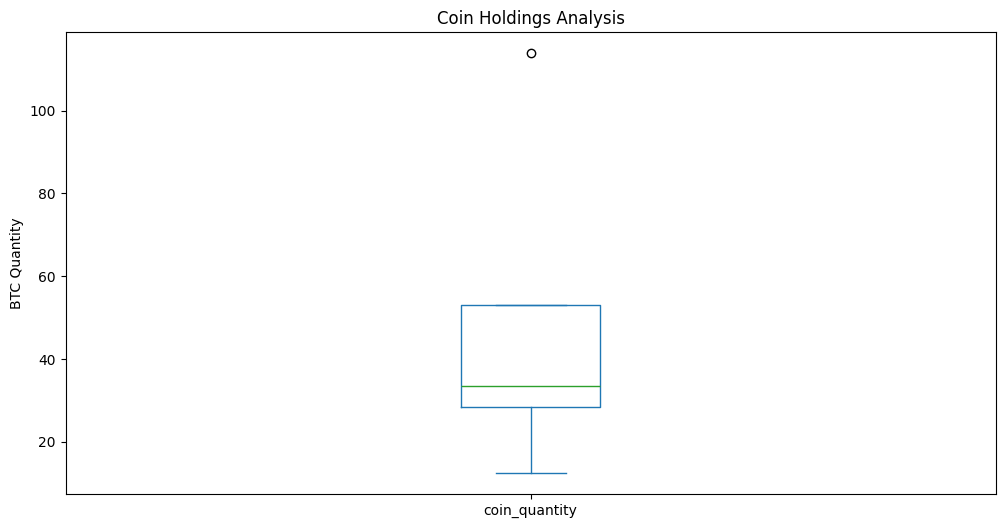

In [71]:
# Analyze coin holdings
# Change the plot type to 'box' for a box plot
boxplot = position_df['coin_quantity'].plot(kind='box', figsize=(12, 6), title='Coin Holdings Analysis')
plt.ylabel('BTC Quantity')
# The x - axis label is not relevant for a box plot, so we can remove it
# plt.xlabel('Metrics')

# Calculate statistics
stats = position_df['coin_quantity'].describe()
mean = stats['mean']
q1 = stats['25%']
q3 = stats['75%']
max_val = stats['max']
min_val = stats['min']

# Assume best_bid is the value of the coin's best bid
best_ask = position_df['best_ask']  # Replace this with the actual best bid value
avg_best_ask = best_ask.mean()

# Add labels for mean, top bound, lower bound, max and min
boxplot.text(1.1, mean, f'Mean: {mean:.2f} ({mean * avg_best_ask:.2f})', verticalalignment='center', color='red')
boxplot.text(1.1, q1, f'Lower Bound: {q1:.2f} ({q1 * avg_best_ask:.2f})', verticalalignment='center', color='green')
boxplot.text(1.1, q3, f'Upper Bound: {q3:.2f} ({q3 * avg_best_ask:.2f})', verticalalignment='center', color='green')
boxplot.text(1.1, max_val, f'Max: {max_val:.2f} ({max_val * avg_best_ask:.2f})', verticalalignment='center', color='purple')
boxplot.text(1.1, min_val, f'Min: {min_val:.2f} ({min_val * avg_best_ask:.2f})', verticalalignment='center', color='purple')

plt.show()

In [72]:
# Correlation analysis
correlation_matrix = position_df[['total_value', 'coin_quantity', 'coin_value', 'best_ask']].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

KeyError: "['best_ask'] not in index"

In [74]:
# Calculate performance metrics using independent total values
initial_value = 10000000

# Calculate returns for each entry
position_df['returns'] = (position_df['total_value'] - initial_value) / initial_value

# Average return (using all entries)
avg_return = position_df['returns'].mean()

# Annualization factor for half-hour periods (24*365.25*2 = 17532 periods per year)
avg_duation = position_df['duration_seconds'].mean()
annualization_factor = 24 * 365 * 60 * 60 / avg_duation
# Calculate compound return
annualized_avg_return = ((1 + avg_return) ** annualization_factor) - 1
annualized_avg_return = avg_return * annualization_factor

# Sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = position_df['returns'].mean() / position_df['returns'].std() * np.sqrt(annualization_factor)

# Max drawdown
position_df['drawdown'] = (position_df['total_value'] - initial_value) / initial_value
max_drawdown = position_df['drawdown'].min()

# Display results
print(f"Annualized Average Return: {annualized_avg_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
# Calculate winning and losing times
position_df['is_win'] = position_df['returns'] > 0
winning_times = position_df['is_win'].sum()
losing_times = len(position_df) - winning_times

# Calculate largest win and largest loss
largest_win = position_df[position_df['is_win']]['returns'].max()
largest_lose = position_df[~position_df['is_win']]['returns'].min()

# Calculate win rate and gain-loss ratio
win_rate = winning_times / len(position_df)
gain_loss_ratio = abs(largest_win / largest_lose) if largest_lose != 0 else 0

print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Winning Times: {winning_times}")
print(f"Losing Times: {losing_times}")
print(f"Largest Win: {largest_win:.6%}")
print(f"Largest Lose: {largest_lose:.6%}")
print(f"Win Rate: {win_rate:.2%}")
print(f"Gain-Loss Ratio: {gain_loss_ratio:.2f}")
print(f'Time-weighted average return: {avg_return:.2%}')


Annualized Average Return: 1047.83%
Sharpe Ratio: 249.71
Max Drawdown: -0.00%
Winning Times: 4
Losing Times: 1
Largest Win: 0.030494%
Largest Lose: -0.002557%
Win Rate: 80.00%
Gain-Loss Ratio: 11.93
Time-weighted average return: 0.01%
